In [1]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/contents/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /contents/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
yelp_reviews=pd.read_csv("/contents/My Drive/review_sample_1.csv")

In [5]:
yelp_reviews.head(2)

,business_id,state,city,categories,review_count,category,cuisine,review_id,user_id,stars,useful,funny,cool,text,date,year,length,labels,business_cnt,American,Asian,Mexican
0,DkIEhR8behaIoSexekWV0Q,AZ,Phoenix,"Restaurants, American (Traditional), Italian, ...",402,Pizza,American,n2JRfEff_aA1A74pmF0ORQ,iY02D6gK7XdoZN6dTiprxw,5.0,0,0,0,We arrived around 7:45pm and the restaurant ne...,2019-07-01 03:10:08,2019,503,0,248,1,0,0
1,H0nIjiZNBTIwrNf4_DwNLQ,AZ,Mesa,"Barbeque, Buffets, Restaurants, Korean, Steakh...",228,Barbeque,American,YnK192P3rMJa9t9z0clY8Q,pNb67lpeSZGXmOWXKWI_3w,2.0,0,0,0,Food is great. But it wasn't the worst experie...,2019-06-20 22:07:12,2019,389,0,164,1,0,0


In [ ]:
# yelp_reviews["labels"]= yelp_reviews["useful"].apply(lambda x: 1 if x >= 1  else 0)

# yelp_reviews["labels"]= yelp_reviews["stars"].apply(lambda x: 1 if x > 3  else 0)

In [6]:
yelp_reviews.labels.value_counts()

1    10000
0    10000
Name: labels, dtype: int64

In [7]:
yelp_reviews.cuisine.value_counts()

American    13380
Asian        3648
Mexican      2972
Name: cuisine, dtype: int64

In [48]:
yelp_reviews[yelp_reviews["cuisine"] == 'Mexican']["labels"].value_counts()

0    1714
1    1258
Name: labels, dtype: int64

In [32]:
#texts = yelp_reviews.loc[:10000, "text"]
#labels = yelp_reviews.loc[:10000, "labels"]

texts = yelp_reviews[yelp_reviews["cuisine"] == 'Mexican']["text"]
labels = yelp_reviews[yelp_reviews["cuisine"] == 'Mexican']["labels"]

#texts = yelp_reviews["text"]
#labels = yelp_reviews["labels"]

In [34]:
texts[0:6]

14    I've always had a great experience here from t...
15    If your coupon says my rolled tacos come with ...
19    My best friend and i used to go here after sch...
20    One of my favorite Bertos.\n Customer service ...
22    Came to Dos, and got served by Ally.  She was ...
25    I have passed this place on the way to the air...
Name: text, dtype: object

In [35]:
labels[0:6]

14    0
15    0
19    0
20    0
22    0
25    0
Name: labels, dtype: int64

In [36]:
max_length = 500 #256
batch_size = 6


In [37]:
!pip install transformers

In [38]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

#tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [39]:
import tensorflow as tf

In [40]:
def convert_example_to_feature(review):
  
  # combine step for tokenization, WordPiece vector mapping, adding special tokens as well as truncating reviews longer than the max length
  
  return tokenizer.encode_plus(review, 
                add_special_tokens = True, # add [CLS], [SEP]
                max_length = max_length, # max length of the text that can go to BERT
                pad_to_max_length = True, # add [PAD] tokens
                return_attention_mask = True, # add attention mask to not focus on pad tokens
                truncation=True
              )

In [41]:
convert_example_to_feature("this is just a test")

{'input_ids': [101, 2023, 2003, 2074, 1037, 3231, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Create x_train

In [42]:
def encode_examples(texts):

  # prepare list, so that we can build up final TensorFlow dataset from slices.
    input_ids_list = []
    token_type_ids_list = []
    attention_mask_list = []
    label_list = []
    i = 0
    
    for review in texts:

        bert_input = convert_example_to_feature(review)

        input_ids_list.append(bert_input['input_ids'])
        token_type_ids_list.append(bert_input['token_type_ids'])
        attention_mask_list.append(bert_input['attention_mask'])
        i += 1

        if i % 3000 == 0: print(i)
        
    bert_inputs = np.array([input_ids_list, attention_mask_list, token_type_ids_list])
        
    return bert_inputs


In [43]:
x_train_1 = encode_examples(texts)

In [44]:
x_train_1.shape

(3, 2972, 500)

In [45]:
x_train_1[0].shape

(2972, 500)

In [46]:
x_train_1[0][0]

array([  101,  1045,  1005,  2310,  2467,  2018,  1037,  2307,  3325,
        2182,  2013,  1996,  2833,  2000,  1996,  2326,  2000,  1996,
       25545,  1011, 14231, 22530,  2015,  7249,   999, 10036, 24570,
        2015,  2008,  2079,  1996,  7577,  2366,  1999,  2613,  7877,
        1998,  4121,  4664, 10826,  1012,  2026, 20672,  2024,  1996,
       20238,  2128, 12179,  2080,  1998,  1996, 25025,  7766,  1012,
        2036,  1010,  1996, 26509,  2003,  2428,  2204,  1012,  6723,
        1037,  2177,  1997,  2814,  1998,  5959,   999,   102,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [47]:
# x_train_1 = [x_train_1[0], x_train_1[1], x_train_1[2]]

### Create y_train

In [23]:
labels.shape[0]

3648

In [24]:
y_train_1 = np.array(labels)
y_train_1.shape

(3648,)

### Validation Dataset

In [25]:
len(x_train_1[0])

3648

In [26]:
numSentences = len(x_train_1[0])
np.random.seed(0)
training_examples = np.random.binomial(1, 0.8, numSentences)

trainSentence_ids = []
trainMasks = []
trainSequence_ids = []

testSentence_ids = []
testMasks = []
testSequence_ids = []

Labels_train =[]
Labels_test = []


for example in range(numSentences):
    if training_examples[example] == 1:
        trainSentence_ids.append(x_train_1[0][example])
        trainMasks.append(x_train_1[1][example])
        trainSequence_ids.append(x_train_1[2][example])
        Labels_train.append(y_train_1[example])
    else:
        testSentence_ids.append(x_train_1[0][example])
        testMasks.append(x_train_1[1][example])
        testSequence_ids.append(x_train_1[2][example])
        Labels_test.append(y_train_1[example])
        
X_train = np.array([trainSentence_ids,trainMasks,trainSequence_ids])
X_test = np.array([testSentence_ids,testMasks,testSequence_ids])

y_train = np.array(Labels_train)
y_test = np.array(Labels_test)

X_train = [X_train[0], X_train[1], X_train[2]]
X_test = [X_test[0], X_test[1], X_test[2]]

# **Model**

In [27]:
from transformers import TFBertModel

### Bert Base

In [28]:
def classifier_model(max_input_length, train_layers, optimizer):
    """
    
    variables:
        max_input_length: number of tokens (max_length + 1)
        train_layers: number of layers to be retrained
        optimizer: optimizer to be used
    
    returns: model
    """
    
    in_id = tf.keras.layers.Input(shape=(max_input_length,), dtype='int32', name="input_ids")
    in_mask = tf.keras.layers.Input(shape=(max_input_length,), dtype='int32', name="input_masks")
    in_segment = tf.keras.layers.Input(shape=(max_input_length,), dtype='int32', name="segment_ids")
    
    
    bert_inputs = [in_id, in_mask, in_segment]
       
    # Note: Bert layer from Hugging Face returns two values: sequence ouput, and pooled output. Here, we only want
    # the former. (See https://huggingface.co/transformers/model_doc/bert.html#tfbertmodel) 
    
    #bert_layer = TFBertModel.from_pretrained('bert-base-cased')

    bert_layer = TFBertModel.from_pretrained('bert-base-uncased')
    
    # Freeze layers, i.e. only train number of layers specified, starting from the top
    
    retrain_layers = []
    
    for retrain_layer_number in range(train_layers):
        
        layer_code = '_' + str(11 - retrain_layer_number)
        retrain_layers.append(layer_code)
    
    for w in bert_layer.weights:
        if not any([x in w.name for x in retrain_layers]):
            w._trainable = False
            
    # End of freezing section
    
    bert_sequence = bert_layer(bert_inputs)[0]
    
    print('Let us check the shape of the BERT layer output:', bert_sequence)
    
    dense = tf.keras.layers.Dense(256, activation='relu', name='dense')(bert_sequence)

    dense = tf.keras.layers.Dropout(rate=0.1)(dense)

    dense1 = tf.keras.layers.Dense(64, activation='relu', name='dense1')(dense)
    
    dense1 = tf.keras.layers.Dropout(rate=0.1)(dense1)
    
    pred = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(dense1)
  
    print('pred: ', pred)    
      
    model = tf.keras.models.Model(inputs=bert_inputs, outputs=pred)

    loss = 'binary_crossentropy'
    metric = 'accuracy'

    model.compile(loss=loss, optimizer=optimizer, metrics=[metric])
       
    #model.summary()
    
    return model

In [ ]:
#adam_customized = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)

#adam_customized = tf.keras.optimizers.Adam(lr=0.0005, beta_1=0.91, beta_2=0.999, epsilon=None, decay=0.1, amsgrad=False)

#adam_customized = tf.keras.optimizers.Adam(lr=0.05, beta_1=0.91, beta_2=0.999, epsilon=None, decay=0.1, amsgrad=False)

#adam_customized = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)

#adam_customized = tf.keras.optimizers.Adam()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


Let us check the shape of the BERT layer output: Tensor("tf_bert_model_2/Identity:0", shape=(None, 500, 768), dtype=float32)
pred:  Tensor("classifier_2/Identity:0", shape=(None, 500, 1), dtype=float32)
Epoch 1/5
181/181 [==============================] - 91s 505ms/step - loss: 0.5974 - accuracy: 0.7057 - val_loss: 0.5324 - val_accuracy: 0.7458
Epoch 2/5
181/181 [==============================] - 89s 494ms/step - loss: 0.5253 - accuracy: 0.7544 - val_loss: 0.4925 - val_accuracy: 0.7745
Epoch 3/5
181/181 [==============================] - 89s 493ms/step - loss: 0.5136 - accuracy: 0.7607 - val_loss: 0.5086 - val_accuracy: 0.7697
Epoch 4/5
181/181 [==============================] - 89s 493ms/step - loss: 0.5008 - accuracy: 0.7668 - val_loss: 0.4818 - val_accuracy: 0.7803
Epoch 5/5
181/181 [==============================] - 89s 493ms/step - loss: 0.5057 - accuracy: 0.7679 - val_loss: 0.4853 - val_accuracy: 0.7745


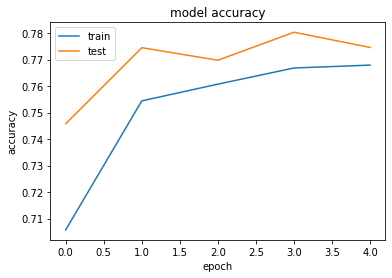

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


Let us check the shape of the BERT layer output: Tensor("tf_bert_model_3/Identity:0", shape=(None, 500, 768), dtype=float32)
pred:  Tensor("classifier_3/Identity:0", shape=(None, 500, 1), dtype=float32)
Epoch 1/5
181/181 [==============================] - 91s 504ms/step - loss: 0.5780 - accuracy: 0.7111 - val_loss: 0.5261 - val_accuracy: 0.7617
Epoch 2/5
181/181 [==============================] - 89s 492ms/step - loss: 0.5207 - accuracy: 0.7515 - val_loss: 0.4881 - val_accuracy: 0.7754
Epoch 3/5
181/181 [==============================] - 89s 493ms/step - loss: 0.5104 - accuracy: 0.7604 - val_loss: 0.4940 - val_accuracy: 0.7720
Epoch 4/5
181/181 [==============================] - 89s 492ms/step - loss: 0.4929 - accuracy: 0.7728 - val_loss: 0.4717 - val_accuracy: 0.7831
Epoch 5/5
181/181 [==============================] - 89s 492ms/step - loss: 0.4930 - accuracy: 0.7715 - val_loss: 0.4841 - val_accuracy: 0.7834


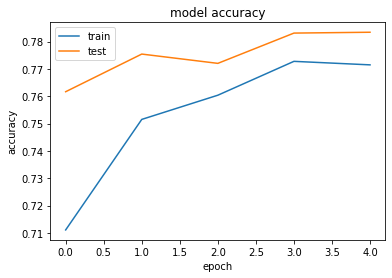

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


Let us check the shape of the BERT layer output: Tensor("tf_bert_model_4/Identity:0", shape=(None, 500, 768), dtype=float32)
pred:  Tensor("classifier_4/Identity:0", shape=(None, 500, 1), dtype=float32)
Epoch 1/5
181/181 [==============================] - 92s 506ms/step - loss: 0.5735 - accuracy: 0.7085 - val_loss: 0.5234 - val_accuracy: 0.7435
Epoch 2/5
181/181 [==============================] - 89s 493ms/step - loss: 0.5156 - accuracy: 0.7512 - val_loss: 0.4859 - val_accuracy: 0.7731
Epoch 3/5
181/181 [==============================] - 89s 493ms/step - loss: 0.5065 - accuracy: 0.7571 - val_loss: 0.5056 - val_accuracy: 0.7644
Epoch 4/5
181/181 [==============================] - 89s 493ms/step - loss: 0.4824 - accuracy: 0.7738 - val_loss: 0.4844 - val_accuracy: 0.7812
Epoch 5/5
181/181 [==============================] - 89s 493ms/step - loss: 0.4764 - accuracy: 0.7783 - val_loss: 0.4756 - val_accuracy: 0.7821


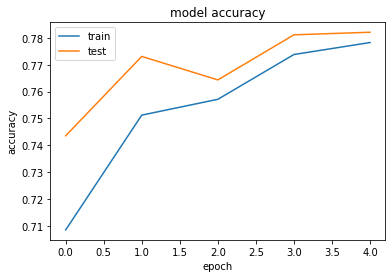

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


Let us check the shape of the BERT layer output: Tensor("tf_bert_model_5/Identity:0", shape=(None, 500, 768), dtype=float32)
pred:  Tensor("classifier_5/Identity:0", shape=(None, 500, 1), dtype=float32)
Epoch 1/5
181/181 [==============================] - 91s 506ms/step - loss: 0.5640 - accuracy: 0.7137 - val_loss: 0.4990 - val_accuracy: 0.7639
Epoch 2/5
181/181 [==============================] - 89s 493ms/step - loss: 0.5091 - accuracy: 0.7562 - val_loss: 0.4830 - val_accuracy: 0.7726
Epoch 3/5
181/181 [==============================] - 89s 493ms/step - loss: 0.4967 - accuracy: 0.7634 - val_loss: 0.4852 - val_accuracy: 0.7783
Epoch 4/5
181/181 [==============================] - 89s 493ms/step - loss: 0.4926 - accuracy: 0.7660 - val_loss: 0.4749 - val_accuracy: 0.7832
Epoch 5/5
181/181 [==============================] - 89s 493ms/step - loss: 0.4776 - accuracy: 0.7772 - val_loss: 0.4763 - val_accuracy: 0.7849


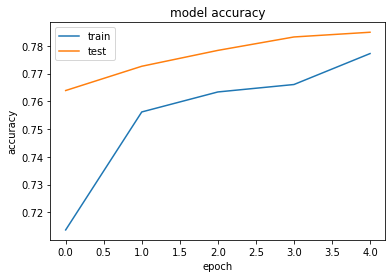

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


Let us check the shape of the BERT layer output: Tensor("tf_bert_model_6/Identity:0", shape=(None, 500, 768), dtype=float32)
pred:  Tensor("classifier_6/Identity:0", shape=(None, 500, 1), dtype=float32)
Epoch 1/5
181/181 [==============================] - 92s 506ms/step - loss: 0.6139 - accuracy: 0.6645 - val_loss: 0.5596 - val_accuracy: 0.7216
Epoch 2/5
181/181 [==============================] - 89s 494ms/step - loss: 0.5544 - accuracy: 0.7247 - val_loss: 0.5215 - val_accuracy: 0.7454
Epoch 3/5
181/181 [==============================] - 89s 493ms/step - loss: 0.5256 - accuracy: 0.7455 - val_loss: 0.5050 - val_accuracy: 0.7573
Epoch 4/5
181/181 [==============================] - 89s 493ms/step - loss: 0.5140 - accuracy: 0.7538 - val_loss: 0.4987 - val_accuracy: 0.7647
Epoch 5/5
181/181 [==============================] - 89s 493ms/step - loss: 0.5094 - accuracy: 0.7567 - val_loss: 0.4918 - val_accuracy: 0.7704


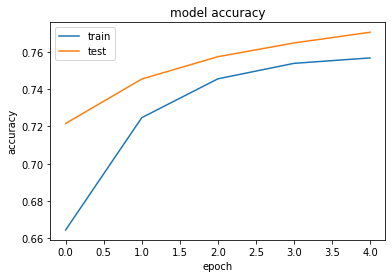

In [36]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

learning_rate = [0.01, 0.005, 0.001, 0.0005, 0.0001]

for lr in learning_rate:
    adam_customized = tf.keras.optimizers.Adam(lr=lr)

    model = classifier_model(max_length, train_layers=0, optimizer = adam_customized)

    history = model.fit(
        X_train, 
        y_train,
        validation_data=(X_test, y_test),
        epochs=5,
        batch_size=16
    )

    # summarize history for accuracy

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


Let us check the shape of the BERT layer output: Tensor("tf_bert_model_1/Identity:0", shape=(None, 500, 768), dtype=float32)
pred:  Tensor("classifier_1/Identity:0", shape=(None, 500, 1), dtype=float32)
Epoch 1/8
181/181 [==============================] - 92s 507ms/step - loss: 0.5565 - accuracy: 0.7200 - val_loss: 0.4935 - val_accuracy: 0.7685
Epoch 2/8
181/181 [==============================] - 89s 494ms/step - loss: 0.5108 - accuracy: 0.7573 - val_loss: 0.4813 - val_accuracy: 0.7774
Epoch 3/8
181/181 [==============================] - 89s 494ms/step - loss: 0.4997 - accuracy: 0.7644 - val_loss: 0.5158 - val_accuracy: 0.7518
Epoch 4/8
181/181 [==============================] - 89s 494ms/step - loss: 0.4859 - accuracy: 0.7721 - val_loss: 0.4713 - val_accuracy: 0.7832
Epoch 5/8
181/181 [==============================] - 89s 494ms/step - loss: 0.4730 - accuracy: 0.7806 - val_loss: 0.4744 - val_accuracy: 0.7850
Epoch 6/8
181/181 [==============================] - 90s 495ms/step - loss: 0

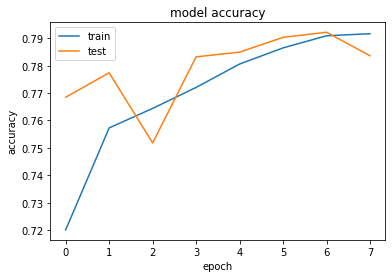

In [31]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=200,
    decay_rate=0.9)


adam_customized = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model = classifier_model(max_length, train_layers=0, optimizer = adam_customized)

history = model.fit(
    X_train, 
    y_train,
    validation_data=(X_test, y_test),
    epochs=8,
    batch_size=16
)

    # summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Bert Fine Tuning

In [29]:
#learning_rate = 2e-5

#adam_customized = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)

adam_customized = tf.keras.optimizers.Adam(lr=0.0005, beta_1=0.91, beta_2=0.999, epsilon=None, decay=0.1, amsgrad=False)

#adam_customized = tf.keras.optimizers.Adam(lr=0.05, beta_1=0.91, beta_2=0.999, epsilon=None, decay=0.1, amsgrad=False)

#adam_customized = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)

#adam_customized = tf.keras.optimizers.Adam()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


Let us check the shape of the BERT layer output: Tensor("tf_bert_model/Identity:0", shape=(None, 500, 768), dtype=float32)
pred:  Tensor("classifier/Identity:0", shape=(None, 500, 1), dtype=float32)
Epoch 1/6
181/181 [==============================] - 149s 823ms/step - loss: 0.5134 - accuracy: 0.7596 - val_loss: 0.4240 - val_accuracy: 0.8199
Epoch 2/6
181/181 [==============================] - 146s 808ms/step - loss: 0.4243 - accuracy: 0.8225 - val_loss: 0.4100 - val_accuracy: 0.8203
Epoch 3/6
181/181 [==============================] - 146s 808ms/step - loss: 0.3831 - accuracy: 0.8393 - val_loss: 0.4128 - val_accuracy: 0.8224
Epoch 4/6
181/181 [==============================] - 146s 807ms/step - loss: 0.3547 - accuracy: 0.8524 - val_loss: 0.4136 - val_accuracy: 0.8170
Epoch 5/6
181/181 [==============================] - 146s 807ms/step - loss: 0.3255 - accuracy: 0.8681 - val_loss: 0.4344 - val_accuracy: 0.8266
Epoch 6/6
181/181 [==============================] - 146s 807ms/step - loss:

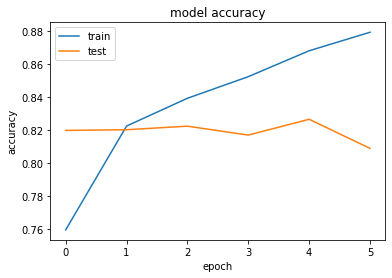

In [30]:
model = classifier_model(max_length, train_layers=6, optimizer = adam_customized)

history = model.fit(
    X_train, 
    y_train,
    validation_data=(X_test, y_test),
    epochs=6,
    batch_size=16
)

# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

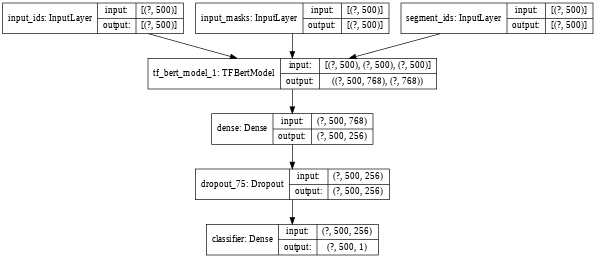

In [ ]:
tf.keras.utils.plot_model(model_tuning, show_shapes=True, dpi=48)